In [531]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score, KFold


Load the Consumer price index data sets. 

In [124]:
pd.read_excel("All_items.xlsx", skiprows = 11)

list_data = []
filenames = glob.glob("*.xlsx")
del filenames[9] #Do not want to include unem
print(filenames)
for file in filenames:
    data = pd.read_excel(file, skiprows = 11)
    data["CPI_Item"] = file.replace(".xlsx", "")
    list_data.append(data)
df1 = pd.concat(list_data, ignore_index = True)
df1.drop(df1.columns[[13,14]], axis=1, inplace=True)




['All_items.xlsx', 'All_items_less_food_and_energy.xlsx', 'Apparel.xlsx', 'Food_and_beverages.xlsx', 'Housing.xlsx', 'Medical_care.xlsx', 'Medical_care_services.xlsx', 'Other_goods_and_services.xlsx', 'Transportation.xlsx']


In [331]:
df1.columns = ["Year","1","2","3","4","5","6","7","8","9","10","11","12", "CPI_Item"]


     Year        1        2        3        4        5        6        7  \
0    1967   33.100   33.100   33.200   33.300   33.400   33.500   33.600   
1    1968   34.200   34.300   34.500   34.600   34.700   34.900   35.100   
2    1969   35.800   36.000   36.300   36.500   36.600   36.800   37.000   
3    1970   38.000   38.200   38.400   38.700   38.800   39.000   39.200   
4    1971   40.000   40.100   40.200   40.400   40.600   40.800   40.900   
5    1972   41.400   41.600   41.600   41.700   41.900   42.000   42.100   
6    1973   42.900   43.200   43.600   43.900   44.100   44.400   44.500   
7    1974   46.900   47.500   48.000   48.300   48.800   49.300   49.700   
8    1975   52.400   52.800   53.000   53.200   53.500   53.900   54.500   
9    1976   56.000   56.100   56.200   56.500   56.800   57.100   57.400   
10   1977   58.900   59.500   59.800   60.300   60.600   61.000   61.300   
11   1978   62.800   63.200   63.700   64.300   64.900   65.600   66.000   
12   1979   

,Year,1,2,3,4,5,6,7,8,9,10,11,12,CPI_Item
0,1967,33.100,33.100,33.200,33.300,33.400,33.500,33.600,33.700,33.800,33.900,34.000,34.100,All_items
1,1968,34.200,34.300,34.500,34.600,34.700,34.900,35.100,35.200,35.300,35.500,35.600,35.700,All_items
2,1969,35.800,36.000,36.300,36.500,36.600,36.800,37.000,37.200,37.300,37.500,37.700,37.900,All_items
3,1970,38.000,38.200,38.400,38.700,38.800,39.000,39.200,39.200,39.400,39.600,39.800,40.000,All_items
4,1971,40.000,40.100,40.200,40.400,40.600,40.800,40.900,41.000,41.000,41.100,41.200,41.300,All_items
5,1972,41.400,41.600,41.600,41.700,41.900,42.000,42.100,42.200,42.400,42.500,42.600,42.700,All_items
6,1973,42.900,43.200,43.600,43.900,44.100,44.400,44.500,45.400,45.500,45.900,46.200,46.500,All_items
7,1974,46.900,47.500,48.000,48.300,48.800,49.300,49.700,50.300,50.900,51.400,51.800,52.200,All_items
8,1975,52.400,52.800,53.000,53.200,53.500,53.900,54.500,54.700,54.900,55.300,55.600,55.800,All_items
9,1976,56.000,56.100,56.200,56.500,56.800,57.100,57.400,57.700,57.900,58.200,58.300,58.500,All_items


In [333]:
df2 = pd.melt(df1, ["Year","CPI_Item"], var_name = "Month", value_name = "CPI_Value")
df3 = pd.pivot_table(df2, index = ["Year", "Month"], values='CPI_Value', columns='CPI_Item').reset_index().rename_axis(None, axis=1)


Load the Unemployment Rate data

In [335]:
data = pd.read_excel("Unemployment_Rate.xlsx", skiprows = 11)
data.columns = ["Year","1","2","3","4","5","6","7","8","9","10","11","12"]
unemployment = pd.melt(data, "Year", var_name = "Month", value_name = "Unemployment_Rate")
unemployment

,Year,Month,Unemployment_Rate
0,1967,1,3.9
1,1968,1,3.7
2,1969,1,3.4
3,1970,1,3.9
4,1971,1,5.9
5,1972,1,5.8
6,1973,1,4.9
7,1974,1,5.1
8,1975,1,8.1
9,1976,1,7.9


Merge the data

In [342]:
df4 = df3.merge(unemployment)


Plot the CPI items's CPI value and Unemployment_Rate by year.

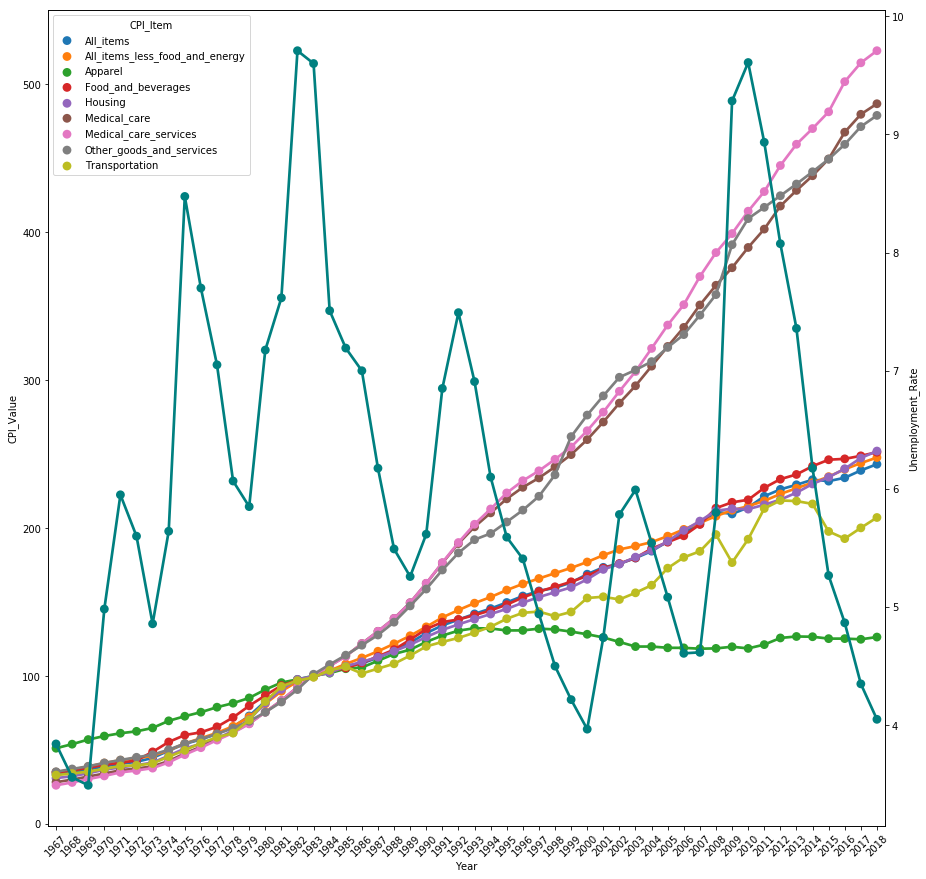

<Figure size 484.75x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

In [437]:
#It seems Unemployment Rate has no correlation with CPI items
#There are different trend in the CPI items. Would it be good to combie them into one metric?

f, ax = plt.subplots(figsize=(15, 15))
plt.xticks(rotation=45)
sns.factorplot(data = df2, x = "Year", y = "CPI_Value", hue = "CPI_Item", ax = ax, ci = None)
plt.clf() #removed extra plot generate by seaborn
ax2 = ax.twinx()
sns.factorplot(data = unemployment, x = "Year", y = "Unemployment_Rate", ax = ax2, color = "Teal", ci = None)
plt.clf()

In [423]:
#The features are Highly multicollinearity 
#This is expected 
#Might not be a good idea to do GLM, but we will still fit an OLS

df5 = df4
df5 = df5.dropna(axis=0, how='any')
df5["Month"].astype(int)
df5.corr()


,Year,All_items,All_items_less_food_and_energy,Apparel,Food_and_beverages,Housing,Medical_care,Medical_care_services,Other_goods_and_services,Transportation,Unemployment_Rate
Year,1.000000,0.997831,0.996994,0.843393,0.997994,0.997607,0.986313,0.982603,0.982011,0.985902,0.039018
All_items,0.997831,1.000000,0.998393,0.851100,0.998367,0.999069,0.984450,0.980412,0.979513,0.992604,0.048535
All_items_less_food_and_energy,0.996994,0.998393,1.000000,0.867270,0.995525,0.997612,0.980293,0.975155,0.974760,0.987148,0.023281
Apparel,0.843393,0.851100,0.867270,1.000000,0.834539,0.844026,0.760477,0.745306,0.741994,0.852683,0.077004
Food_and_beverages,0.997994,0.998367,0.995525,0.834539,1.000000,0.998043,0.989025,0.986129,0.984612,0.988498,0.055315
Housing,0.997607,0.999069,0.997612,0.844026,0.998043,1.000000,0.985066,0.981322,0.979817,0.988437,0.043325
Medical_care,0.986313,0.984450,0.980293,0.760477,0.989025,0.985066,1.000000,0.999635,0.998073,0.968673,-0.000650
Medical_care_services,0.982603,0.980412,0.975155,0.745306,0.986129,0.981322,0.999635,1.000000,0.998042,0.964609,0.002832
Other_goods_and_services,0.982011,0.979513,0.974760,0.741994,0.984612,0.979817,0.998073,0.998042,1.000000,0.963453,0.009110
Transportation,0.985902,0.992604,0.987148,0.852683,0.988498,0.988437,0.968673,0.964609,0.963453,1.000000,0.095014


In [572]:
model = linear_model.LinearRegression(fit_intercept = True)

X_train, X_test = train_test_split(df5.loc[:,:"Transportation"], test_size = 0.75, random_state = 2000)
Y_train, Y_test = train_test_split(df5.loc[:,"Unemployment_Rate"], test_size = 0.75, random_state = 2000)

model.fit(X_train, Y_train)

print(model.predict(X_test))
residual = Y_test - (model.predict(X_test))
print(residual)
print("MSE is", np.mean(sum(residual)**2))
print("R^2 is",model.score(X_train,Y_train))


[6.97831632 7.27228927 5.20002048 6.74564564 5.93415776 4.66860165
 5.58170466 7.11890274 3.59091846 6.605047   4.79303737 5.9655012
 6.04704597 7.0521231  5.73717951 5.66767012 6.02600536 4.62608799
 6.6835934  4.0459424  5.95273771 6.92197953 4.2952054  5.31435984
 5.09799156 7.09855367 5.30766933 4.86145524 5.00180945 7.44685653
 7.15976307 8.28948076 5.16832792 5.01627662 8.36912709 6.84634909
 6.94356116 4.78725936 5.54768395 6.60865506 4.5857855  7.83037482
 6.94601718 8.03845883 6.09319521 5.15944094 8.70716728 4.83941213
 7.56254526 8.0751486  4.80362593 6.26329539 5.17796068 7.61569966
 8.05370395 8.45810338 4.81396196 3.7361588  7.53193169 4.16844753
 6.221705   6.55926774 5.70475656 7.80045097 7.23777158 5.47028304
 8.21344935 5.12502716 5.7044108  5.69157689 6.30763242 7.75386853
 6.06245708 4.12842729 6.41064065 6.2539615  7.30084615 6.06375767
 6.8193437  8.1473308  7.44719748 5.63428298 7.05011158 6.59341188
 4.70318548 4.19515229 6.45564791 5.81309544 7.36734409 5.23526

(array([17., 65., 64., 40., 44., 61., 69., 53., 31., 18.]),
 array([3.59091846, 4.10254335, 4.61416823, 5.12579311, 5.63741799,
        6.14904287, 6.66066775, 7.17229264, 7.68391752, 8.1955424 ,
        8.70716728]),
 <a list of 10 Patch objects>)

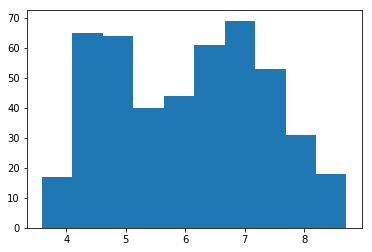

In [351]:
plt.hist(Y_test - residual)

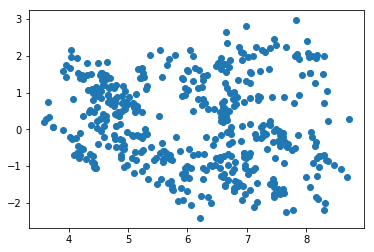

In [352]:
plt.plot(model.predict(X_test), residual, 'o')

In [571]:
#Kfold

kf_10 = KFold(n_splits=10, shuffle=True, random_state=2000)


MSE = -1*cross_val_score(model, df5.loc[:,:"Transportation"], df5.loc[:,"Unemployment_Rate"], scoring='neg_mean_squared_error', cv=kf_10)
print("K-fold = 10 MSE", MSE)
R_Square = cross_val_score(model, df5.loc[:,:"Transportation"], df5.loc[:,"Unemployment_Rate"], cv=kf_10)
print("K-fold = 10 R^2",R_Square)



K-fold = 10 MSE [1.47905218 1.17529276 1.14351646 1.33016363 1.26289099 1.30200659
 1.37682355 1.77104357 1.07612381 1.51207282]
K-fold = 10 R^2 [0.51270616 0.50373691 0.43630782 0.52423652 0.46337659 0.38044585
 0.41826691 0.5113687  0.53543349 0.53068087]
